<a href="https://colab.research.google.com/github/AlifiyulAkyun/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Alifiyul Akyun 
* Kelas : TI-3B
* No : 04
* Materi : Object Detection

In [1]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from PIL import Image
     

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya

* Jawaban :

* TEMPLATE MATCHING

* Menggunakan library opencv:

* cv.matchTemplate(), dengan parameter:

* Imange: citra input
* templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
* method: metode dari tempte matching
* Jenis metode template matching di opencv:

* TM_SQDIFF
* TM_SGDIFF_NORMED
* TM_CCORR
* TM_CCORR_NORMED
* TM_CCOEFF
* TM_CCOEFF_NORMED

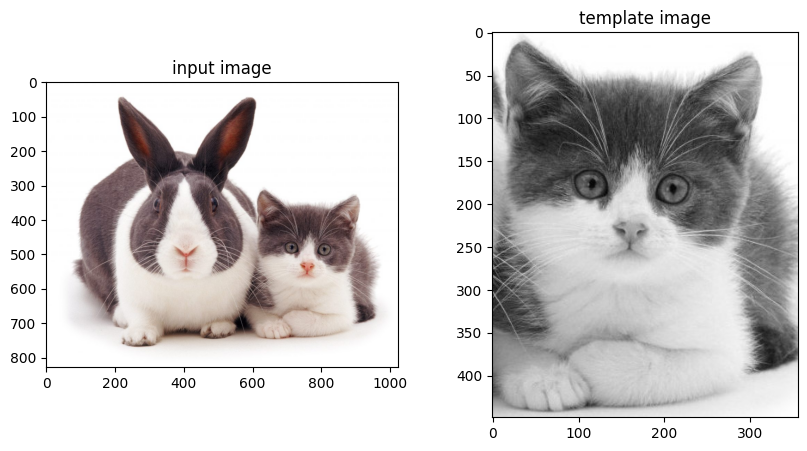

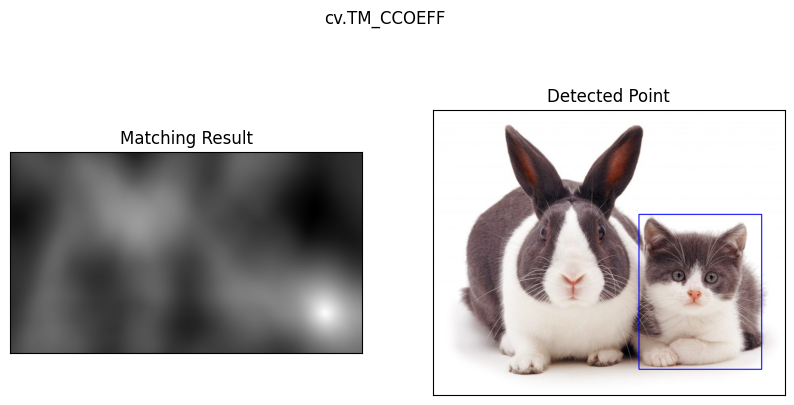

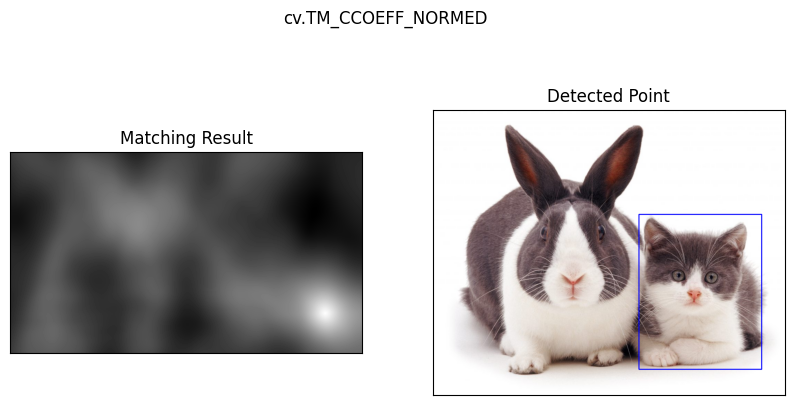

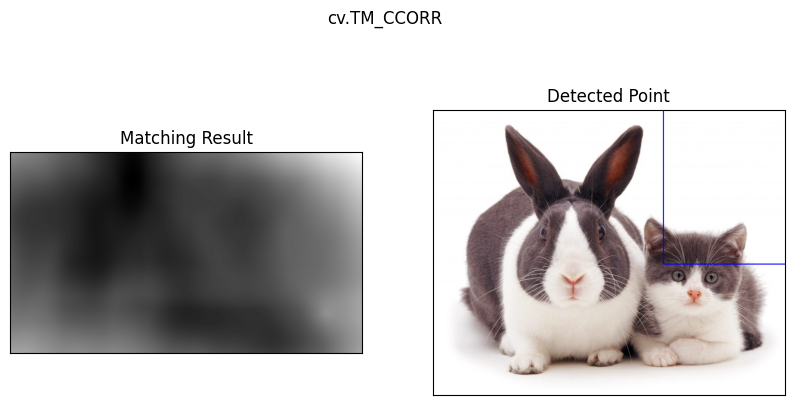

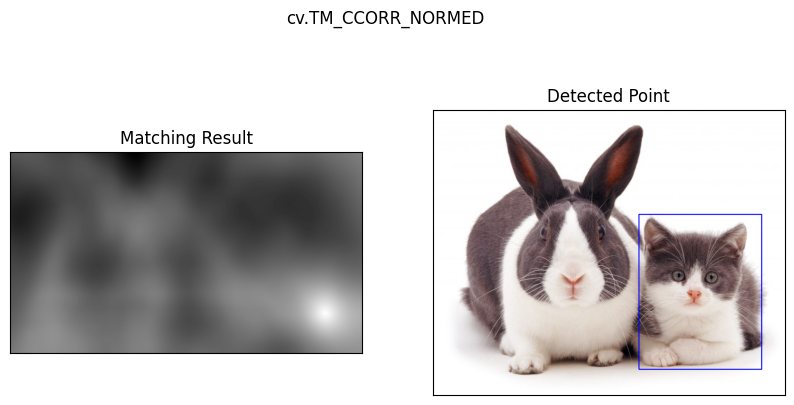

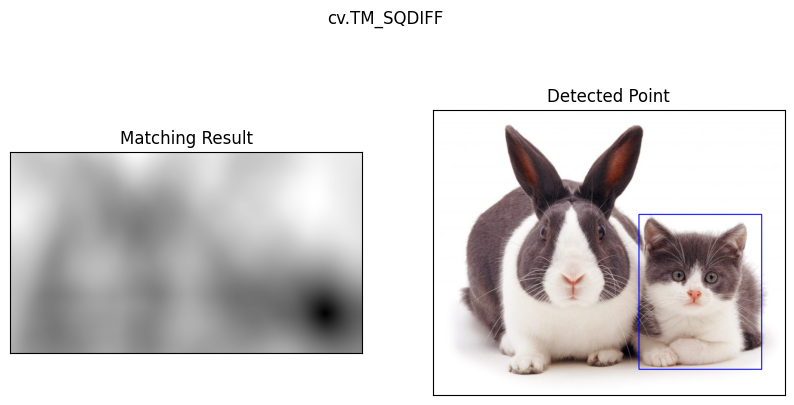

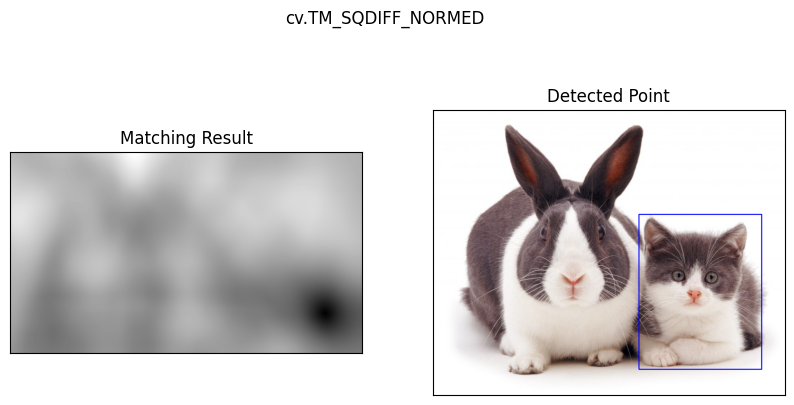

In [6]:
bunny_cat = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/cats_and_bunnies.jpg')
bunny_cat_gray = cv.cvtColor(bunny_cat, cv.COLOR_BGR2GRAY)
image = bunny_cat.copy()

cat = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/cat2_templatejpg.jpg',0)
w, h = cat.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(10,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(bunny_cat, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(cat, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = image.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(bunny_cat_gray,cat,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

* 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

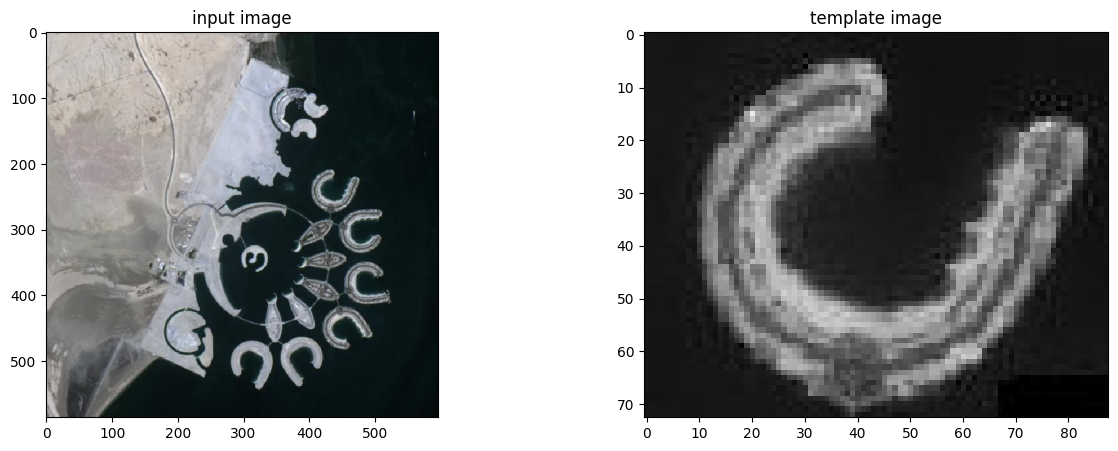

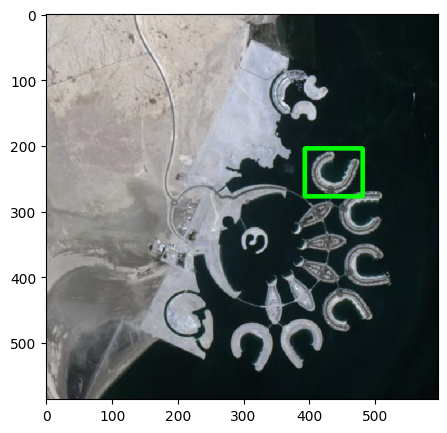

In [8]:
#Nomor 2 (Implementasikan 6 metode template matching pada OpenCV)
# load citra input 
img1 = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = img1.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/bahrain-template.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt.subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Apply template Matching
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# memilih nilai maks  
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# membuat rectangle pada citra input
cv.rectangle(img2,top_left, bottom_right,(0,255,0),6)

# print citra input dengan rectangle
plt.figure(figsize=(15,5))
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

* 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

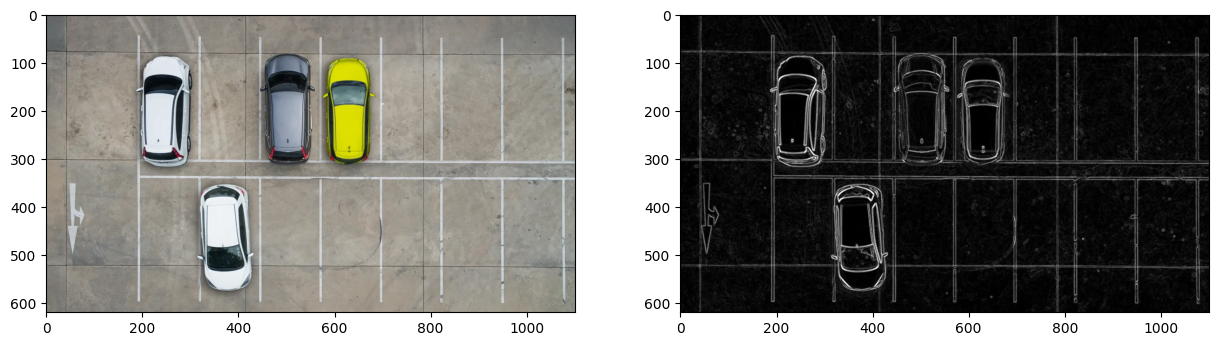

In [9]:

# Sobel Edge Detection
parking = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/car-park.jpg')
# converting to gray scale
gray = cv.cvtColor(parking, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(parking, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(parking, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
plt.show()

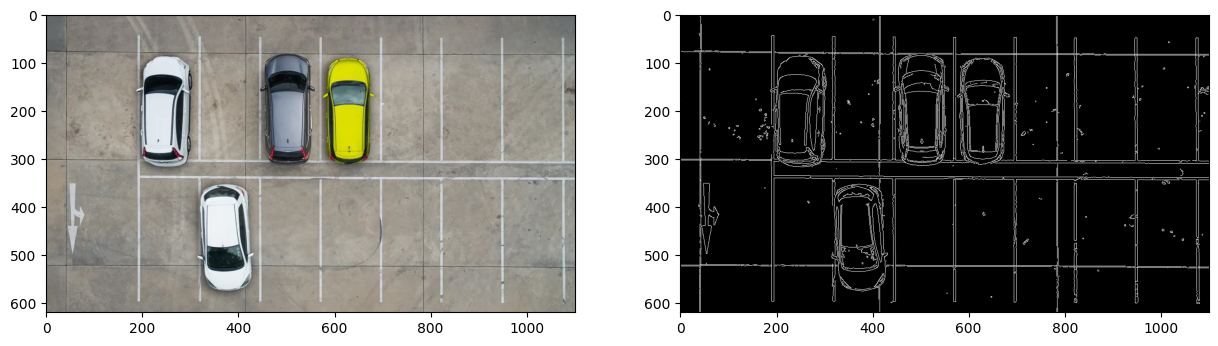

In [10]:
# Candy Edge Detection

img = parking.copy()
edges = cv.Canny(img,100,200)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.show()

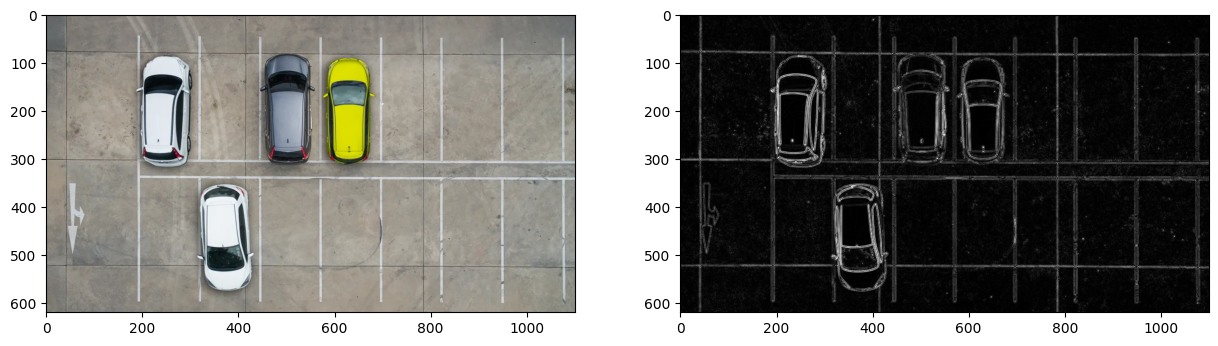

In [11]:
# Laplacian Edge Detection
img2 = parking.copy()

# remove noise
img_parking = cv.GaussianBlur(img2,(3,3),0)
parking_gray = cv.cvtColor(img_parking, cv.COLOR_BGR2GRAY)
filtered_image = cv.Laplacian(parking_gray, ksize=3, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(filtered_image,cmap = 'gray')
#axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.show()

* 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg

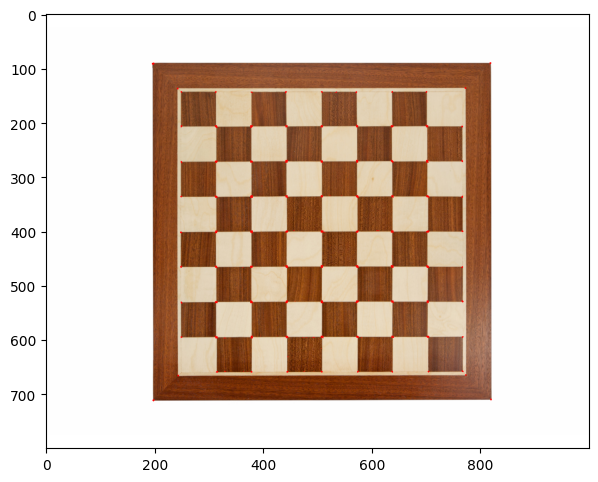

In [13]:

# Harris Corner Detection
# Load citra input 
input_img = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
# Hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

# Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(7,7)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

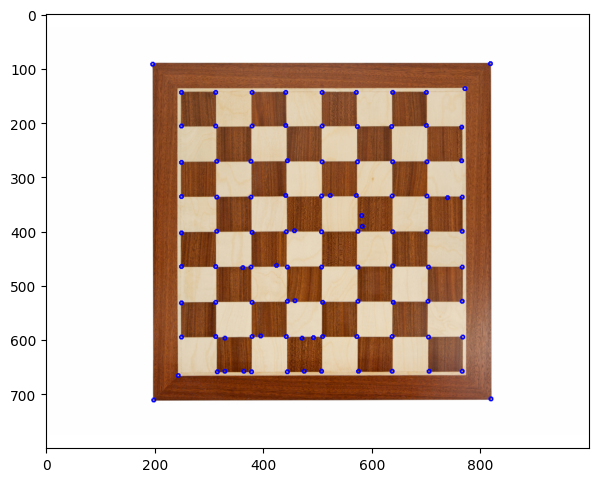

In [14]:

# Shi-Tomasi Detection
input_img = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(7,7)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


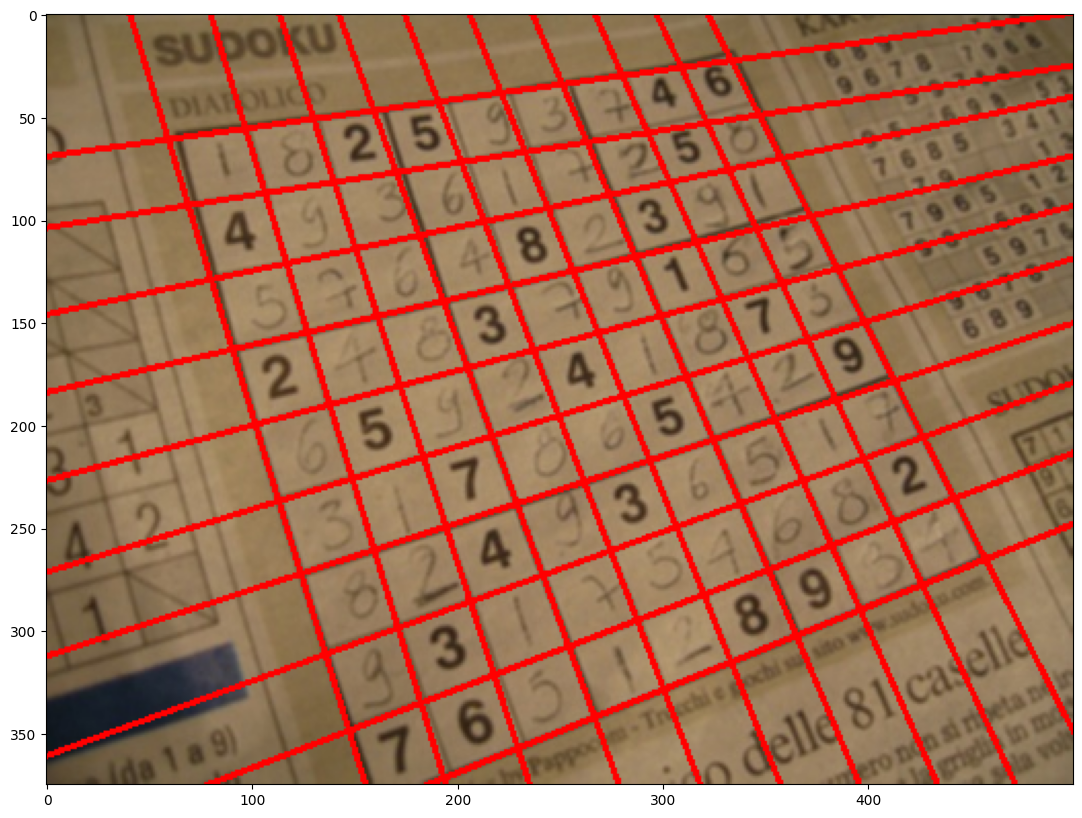

In [17]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))
    
    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

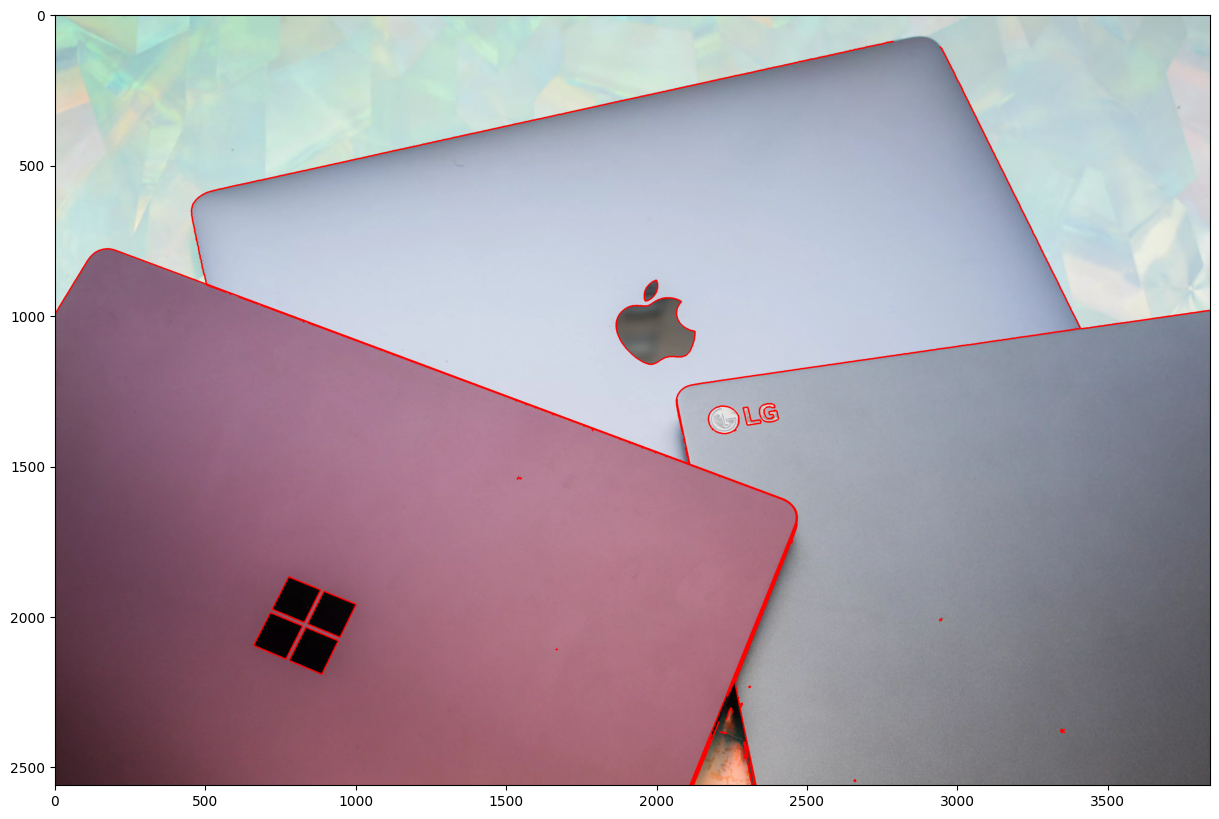

In [18]:

img = cv.imread('/content/drive/MyDrive/PCVK/image/Object Detection/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# deteksi tepi gambar menggunakan metode canny dengan nilai threshold awal 30 dan akhir 200
edged = cv.Canny(img_gray, 30, 200)

#countur dari edge
# cv.RETR_EXTERNAL = mencari kontur paling luar 
#cv.CHAIN_APPROX_NONE = tidak melakukan aproksimasi pada titik-titik kontur
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))